In [1]:
from datetime import datetime

from matplotlib import pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
class MachineLearning():

    def __init__(self):
        
        print("Loading dataset ...")
        
        self.flow_dataset = pd.read_csv('FlowStatsfile.csv')

        self.flow_dataset.iloc[:, 2] = self.flow_dataset.iloc[:, 2].str.replace('.', '')
        self.flow_dataset.iloc[:, 3] = self.flow_dataset.iloc[:, 3].str.replace('.', '')
        self.flow_dataset.iloc[:, 5] = self.flow_dataset.iloc[:, 5].str.replace('.', '')        

    def flow_training(self):

        print("Flow Training ...")
        
        X_flow = self.flow_dataset.iloc[:, :-1].values
        X_flow = X_flow.astype('float64')

        y_flow = self.flow_dataset.iloc[:, -1].values

        X_flow_train, X_flow_test, y_flow_train, y_flow_test = train_test_split(X_flow, y_flow, test_size=0.25, random_state=0)

        classifier = LogisticRegression(solver='liblinear', random_state=0)
        flow_model = classifier.fit(X_flow_train, y_flow_train)

        y_flow_pred = flow_model.predict(X_flow_test)

        print("------------------------------------------------------------------------------")

        print("confusion matrix")
        cm = confusion_matrix(y_flow_test, y_flow_pred)
        print(cm)

        acc = accuracy_score(y_flow_test, y_flow_pred)

        print("succes accuracy = {0:.2f} %".format(acc*100))
        fail = 1.0 - acc
        print("fail accuracy = {0:.2f} %".format(fail*100))
        print("------------------------------------------------------------------------------")
        
        
        benin = 0
        ddos = 0
        for i in y_flow:
            if i == 0:
                benin += 1
            elif i == 1:
                ddos += 1
                
        print("benin = ", benin)
        print("ddos = ", ddos)
        print("------------------------------------------------------------------------------")
        
        plt.title("Dataset")
        # plt.xlabel('Type de flux')
        # plt.ylabel('Nombre de flux')
        plt.tight_layout()
        # plt.style.use("seaborn-darkgrid")
        # plt.bar(['NORMAL','DDOS'],[benin,ddos])
        # plt.legend()
        
        explode = [0, 0.1]
        
        plt.pie([benin,ddos], labels=['NORMAL','DDoS'], wedgeprops={'edgecolor':'black'}
                , explode=explode, autopct="%1.2f%%")
        plt.show()
        
        icmp = 0
        tcp = 0
        udp = 0
        
        proto = self.flow_dataset.iloc[:, 7].values
        proto = proto.astype('int')
        for i in proto:
            if i == 6:
                tcp += 1
            elif i == 17:
                udp += 1
            elif i == 1:
                icmp += 1

        print("tcp = ", tcp)
        print("udp = ", udp)
        print("icmp = ", icmp)
        
        plt.title("Dataset")
        # plt.xlabel('Protocole')
        # plt.ylabel('Nombre de flux')
        # plt.tight_layout()
        # plt.style.use("seaborn-darkgrid")
        # plt.bar(['ICMP','TCP','UDP'],[icmp,tcp,udp])
        # plt.legend()
        
        explode = [0, 0.1, 0.1]
        
        plt.pie([icmp,tcp,udp], labels=['ICMP','TCP','UDP'], wedgeprops={'edgecolor':'black'}
                , explode=explode, autopct="%1.2f%%")
        plt.show()
        
        icmp_normal = 0
        tcp_normal = 0
        udp_normal = 0
        icmp_ddos = 0
        tcp_ddos = 0
        udp_ddos = 0
        
        proto = self.flow_dataset.iloc[:, [7,-1]].values
        proto = proto.astype('int')
       
        for i in proto:
            if i[0] == 6 and i[1] == 0:
                tcp_normal += 1
            elif i[0] == 6 and i[1] == 1:
                tcp_ddos += 1
            
            if i[0] == 17 and i[1] == 0:
                udp_normal += 1
            elif i[0] == 17 and i[1] == 1:
                udp_ddos += 1
            
            if i[0] == 1 and i[1] == 0:
                icmp_normal += 1
            elif i[0] == 1 and i[1] == 1:
                icmp_ddos += 1

        print("tcp_normal = ", tcp_normal)
        print("tcp_ddos = ", tcp_ddos)
        print("udp_normal = ", udp_normal)
        print("udp_ddos = ", udp_ddos)
        print("icmp_normal = ", icmp_normal)
        print("icmp_ddos = ", icmp_ddos)
        
        plt.title("Dataset")
        # plt.xlabel('Protocole')
        # plt.ylabel('Nombre de flux')
        # plt.tight_layout()
        # plt.style.use("seaborn-darkgrid")
        # plt.bar(['ICMP_N','ICMP_D','TCP_N','TCP_D','UDP_N','UDP_D'],[icmp_normal,icmp_ddos,tcp_normal,tcp_ddos,udp_normal,udp_ddos])
        # plt.legend()
        
        explode = [0, 0.1, 0.1, 0.1, 0.1, 0.1]
        
        plt.pie([icmp_normal,icmp_ddos,tcp_normal,tcp_ddos,udp_normal,udp_ddos], 
                labels=['ICMP_Normal','ICMP_DDoS','TCP_Normal','TCP_DDoS','UDP_Normal','UDP_DDoS'], 
                wedgeprops={'edgecolor':'black'}, explode=explode, autopct="%1.2f%%")
        plt.show()
        
        
        
        plt.title("Dataset")
        plt.xlabel('Temps de génération')
        plt.ylabel('Number of flows')
        plt.tight_layout()
        plt.style.use("ggplot")
        plt.plot(X_flow[:,0],y_flow)
        plt.legend()
        plt.show()
        
        
        x = ['TP','FP','FN','TN']
        plt.title("Régression Logistique")
        plt.xlabel('Class predict')
        plt.ylabel('Number of flows')
        plt.tight_layout()
        plt.style.use("ggplot")
        y = [cm[0][0],cm[0][1],cm[1][0],cm[1][1]]
        plt.bar(x,y, color="#1b7021", label='LR')
        plt.legend()
        
        plt.pie(y, labels=x, wedgeprops={'edgecolor':'black'})
        plt.show()
        

Loading dataset ...
Flow Training ...
------------------------------------------------------------------------------
confusion matrix
[[     0 226596]
 [     0 440285]]
succes accuracy = 66.02 %
fail accuracy = 33.98 %
------------------------------------------------------------------------------
benin =  906853
ddos =  1760670
------------------------------------------------------------------------------


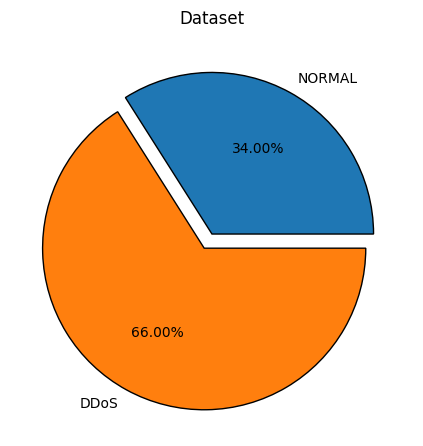

tcp =  1049467
udp =  609910
icmp =  1008146


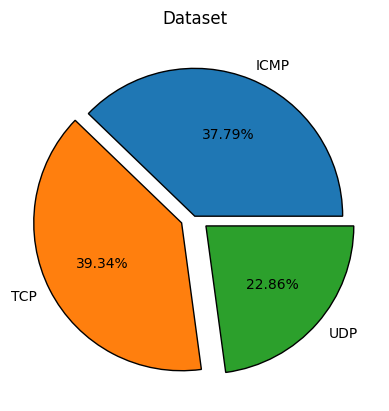

tcp_normal =  359530
tcp_ddos =  689937
udp_normal =  127844
udp_ddos =  482066
icmp_normal =  419479
icmp_ddos =  588667


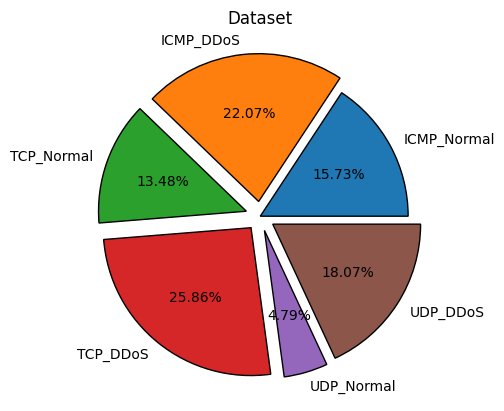

C:\Users\nghia\AppData\Local\Temp\ipykernel_9044\3194364772.py:157: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


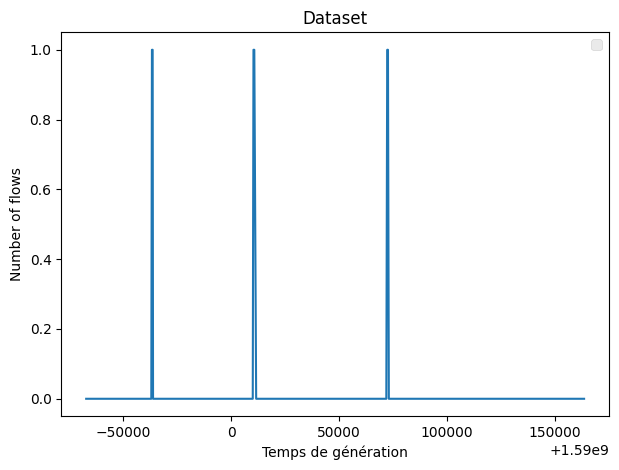

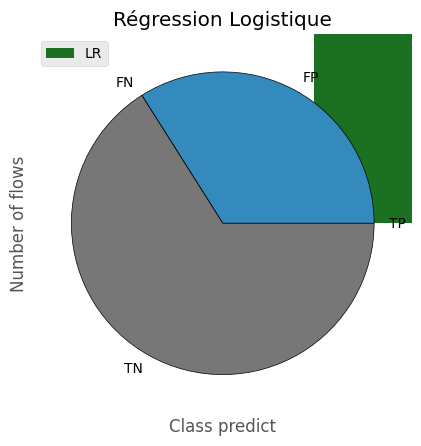

Training time:  0:00:51.347948


In [6]:
def main():
    start = datetime.now()
    
    ml = MachineLearning()
    ml.flow_training()

    end = datetime.now()
    print("Training time: ", (end-start)) 

if __name__ == "__main__":
    main()